## Import Libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## Import Data

In [4]:
dataset = pd.read_excel("Prepared_Datasets/VNIR_dataset_add_light_intensity.xlsx")
target = pd.read_excel("Sugar_Quantities.xlsx")

In [5]:
dataset.head(3)

,Img_name,Band_001,Band_002,Band_003,Band_004,Band_005,Band_006,Band_007,Band_008,Band_009,...,Band_151,Band_152,Band_153,Band_154,Band_155,Band_156,Band_157,Band_158,Band_159,Band_160
0,38367,2350.74,2503.44,2618.51,2702.48,2812.56,2923.92,2977.99,3179.99,3341.41,...,43322.10,43235.76,43079.62,43033.55,43024.23,43113.70,43204.23,43545.00,43935.19,43880.61
1,38368,1943.93,2045.13,2137.17,2218.26,2296.50,2378.83,2427.96,2590.40,2722.22,...,39903.84,39712.49,39435.29,39370.42,39304.76,39306.14,39363.92,39600.45,39972.84,39928.45
2,38369,2687.16,2853.17,2974.04,3099.90,3219.05,3353.07,3414.18,3657.44,3839.36,...,49363.80,49242.31,49010.10,48907.97,48938.23,49031.54,49079.36,49483.66,49973.24,49892.32


In [6]:
target_columns = ['Barcode', 'Print_Info', 'Variety_ID', 'Variety', 'Batch', 'Sample', 'Glucose', 'Fructose', 'Sucrose', 'Raffinose',
                 'Kestose', 'Maltose', 'Nystose', 'Kestopentaose', 'Total_Fructan']
target.columns = target_columns

In [7]:
# g = sns.pairplot(target[['Glucose','Fructose','Sucrose', 'Raffinose', 'Kestose', 'Maltose', 'Nystose', 'Kestopentaose']])

In [8]:
cor2 = target.iloc[:, [7, 8, 9, 10, 11, 12, 13, 14]].corr()

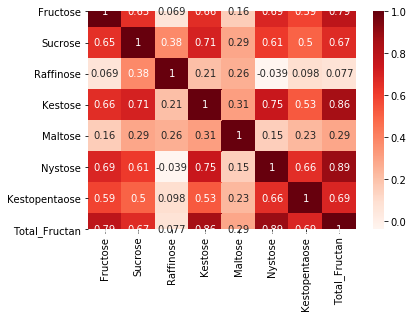

In [9]:
sns.heatmap(cor2, annot=True, cmap=plt.cm.Reds)
plt.show()

### adding helper columns on target dataset

#### adding counts of varieties

In [10]:
counts = pd.value_counts(target['Variety_ID'])
counts_index = np.array([counts.index]).reshape(-1, 1)
counts_values = np.array([counts.values]).reshape(-1, 1)

In [11]:
counts_data = np.concatenate((counts_index, counts_values),axis = 1)

In [12]:
counts_df = pd.DataFrame(data = counts_data, columns = ['Variety_ID', 'Variety_counts'])

In [13]:
target = pd.merge(left = target, right = counts_df, how = 'outer', left_on = 'Variety_ID', right_on = 'Variety_ID')

In [14]:
# target.head(2)

#### adding variety number of counts

In [15]:
target.insert(loc = 16, column = "Variety_number", value = "")

In [16]:
for r in range(0, target.shape[0]):
    num = 0
    Variety_ID = target.Variety_ID[r]
    for x in range(r, target.shape[0]):
        if target.Variety_ID[x] == Variety_ID:
            num = num + 1
    target.Variety_number[r] = num

C:\Users\ahmad\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [17]:
target.head(3)

,Barcode,Print_Info,Variety_ID,Variety,Batch,Sample,Glucose,Fructose,Sucrose,Raffinose,Kestose,Maltose,Nystose,Kestopentaose,Total_Fructan,Variety_counts,Variety_number
0,38368.0,Cabaret-R1_L1P3,26,Cabaret,1,1,0.525990,0.389049,14.139681,6.957827,2.297757,0.607435,0.838198,0.068990,7.209828,3,3
1,38632.0,Cabaret-R2_L12P3,26,Cabaret,11,251,0.587680,0.594920,14.475188,5.263027,2.500238,0.577737,0.980051,0.070338,6.219160,3,2
2,38765.0,Cabaret-R3_L17P16,26,Cabaret,18,413,0.383404,0.329895,9.469324,3.742113,1.605575,0.640902,0.251107,0.015643,4.087977,3,1


### Prepare dataset with different scalings to try each and find which one works better

#### Max_min scaler, scaling dataset in the range of 0 and 1

In [18]:
scaler = MinMaxScaler()
scaled_dataset = dataset.iloc[:, 1:]
min_max_scaled_dataset = scaler.fit_transform(scaled_dataset)

In [19]:
min_max_scaled_dataset = pd.DataFrame(data = min_max_scaled_dataset)
min_max_scaled_dataset.insert(loc = 0, column = "img", value = dataset.Img_name)
min_max_scaled_dataset.columns = dataset.columns

In [20]:
min_max_scaled_dataset = pd.merge(left = min_max_scaled_dataset, right = target, how = "inner", left_on = "Img_name", right_on = "Barcode")
min_max_scaled_dataset.head(3)

,Img_name,Band_001,Band_002,Band_003,Band_004,Band_005,Band_006,Band_007,Band_008,Band_009,...,Fructose,Sucrose,Raffinose,Kestose,Maltose,Nystose,Kestopentaose,Total_Fructan,Variety_counts,Variety_number
0,38367,0.313722,0.308081,0.306925,0.310349,0.316459,0.328144,0.352175,0.327589,0.329384,...,0.938528,11.580359,7.191522,2.508236,1.132254,0.454942,0.493446,7.451642,3,2
1,38368,0.247693,0.241106,0.240679,0.245636,0.249189,0.257543,0.277158,0.257827,0.259397,...,0.389049,14.139681,6.957827,2.297757,0.607435,0.838198,0.068990,7.209828,3,3
2,38369,0.368325,0.359189,0.355855,0.363462,0.369446,0.383728,0.411665,0.384082,0.385668,...,0.364791,11.247442,5.236240,2.417849,0.497984,1.378649,0.221425,8.311020,3,3


#### not scaled dataset

In [21]:
not_scaled_dataset = pd.merge(left = dataset, right = target, how = "inner", left_on = "Img_name", right_on = "Barcode")
not_scaled_dataset.head(3)

,Img_name,Band_001,Band_002,Band_003,Band_004,Band_005,Band_006,Band_007,Band_008,Band_009,...,Fructose,Sucrose,Raffinose,Kestose,Maltose,Nystose,Kestopentaose,Total_Fructan,Variety_counts,Variety_number
0,38367,2350.74,2503.44,2618.51,2702.48,2812.56,2923.92,2977.99,3179.99,3341.41,...,0.938528,11.580359,7.191522,2.508236,1.132254,0.454942,0.493446,7.451642,3,2
1,38368,1943.93,2045.13,2137.17,2218.26,2296.50,2378.83,2427.96,2590.40,2722.22,...,0.389049,14.139681,6.957827,2.297757,0.607435,0.838198,0.068990,7.209828,3,3
2,38369,2687.16,2853.17,2974.04,3099.90,3219.05,3353.07,3414.18,3657.44,3839.36,...,0.364791,11.247442,5.236240,2.417849,0.497984,1.378649,0.221425,8.311020,3,3


## Datasets

### Split based on Variety_ID

In [22]:
dataset_test_no_scale = not_scaled_dataset[not_scaled_dataset.Variety_number == 1]
dataset_train_no_scale = not_scaled_dataset[not_scaled_dataset.Variety_number > 1]

dataset_test_min_max = min_max_scaled_dataset[min_max_scaled_dataset.Variety_number == 1]
dataset_train_min_max = min_max_scaled_dataset[min_max_scaled_dataset.Variety_number > 1]

In [23]:
# min_max_scaled_dataset.Variety_number.unique()
# min_max_scaled_dataset.sort_values(by = ['Variety_ID'], axis=0, ascending=True, inplace=True, kind='quicksort', na_position='last')

In [40]:
# ************************** no scaled training and test split based on varieties ***************************
X_train_no_scale = dataset_train_no_scale.iloc[:,1:161]
y_train_no_scale = dataset_train_no_scale.iloc[:,167:176]

X_test_no_scale = dataset_test_no_scale.iloc[:,1:161]
y_test_no_scale = dataset_test_no_scale.iloc[:,167:176]

# *************************** min max training and test split based on varieties ****************************
# X_train_min_max = dataset_train_min_max.iloc[:,1:417]
# y_train_min_max = dataset_train_min_max.iloc[:,423:432]

# X_test_min_max = dataset_test_min_max.iloc[:,1:417]
# y_test_min_max = dataset_test_min_max.iloc[:,423:432]

# Note: min max transformation of dataset do not give proper result

# Algorithms

## Lasso

In [41]:
target.columns

Index(['Barcode', 'Print_Info', 'Variety_ID', 'Variety', 'Batch', 'Sample',
       'Glucose', 'Fructose', 'Sucrose', 'Raffinose', 'Kestose', 'Maltose',
       'Nystose', 'Kestopentaose', 'Total_Fructan', 'Variety_counts',
       'Variety_number'],
      dtype='object')

In [42]:
y_train_no_scale_Glucose = y_train_no_scale.Glucose
y_train_no_scale_Fructose = y_train_no_scale.Fructose
y_train_no_scale_Sucrose = y_train_no_scale.Sucrose
y_train_no_scale_Raffinose = y_train_no_scale.Raffinose
y_train_no_scale_Kestose = y_train_no_scale.Kestose
y_train_no_scale_Maltose = y_train_no_scale.Maltose
y_train_no_scale_Nystose = y_train_no_scale.Nystose
y_train_no_scale_Kestopentaose = y_train_no_scale.Kestopentaose
y_train_no_scale_Total_Fructan = y_train_no_scale.Total_Fructan

y_test_no_scale_Glucose = y_test_no_scale.Glucose
y_test_no_scale_Fructose = y_test_no_scale.Fructose
y_test_no_scale_Sucrose = y_test_no_scale.Sucrose
y_test_no_scale_Raffinose = y_test_no_scale.Raffinose
y_test_no_scale_Kestose = y_test_no_scale.Kestose
y_test_no_scale_Maltose = y_test_no_scale.Maltose
y_test_no_scale_Nystose = y_test_no_scale.Nystose
y_test_no_scale_Kestopentaose = y_test_no_scale.Kestopentaose
y_test_no_scale_Total_Fructan = y_test_no_scale.Total_Fructan

In [43]:
lasso_no_scale_Glucose = linear_model.Lasso(max_iter=100000, tol=0.001)
lasso_no_scale_Fructose = linear_model.Lasso(max_iter=100000, tol=0.001)
lasso_no_scale_Sucrose = linear_model.Lasso(max_iter=100000, tol=0.001)
lasso_no_scale_Raffinose = linear_model.Lasso(max_iter=100000, tol=0.001)
lasso_no_scale_Kestose = linear_model.Lasso(max_iter=100000, tol=0.001)
lasso_no_scale_Maltose = linear_model.Lasso(max_iter=100000, tol=0.001)
lasso_no_scale_Nystose = linear_model.Lasso(max_iter=100000, tol=0.001)
lasso_no_scale_Kestopentaose = linear_model.Lasso(max_iter=100000, tol=0.001)
lasso_no_scale_Total_Fructan = linear_model.Lasso(max_iter=100000, tol=0.001)

In [44]:
lasso_no_scale_Glucose.fit(X_train_no_scale, y_train_no_scale_Glucose)
lasso_no_scale_Fructose.fit(X_train_no_scale, y_train_no_scale_Fructose)
lasso_no_scale_Sucrose.fit(X_train_no_scale, y_train_no_scale_Sucrose)
lasso_no_scale_Raffinose.fit(X_train_no_scale, y_train_no_scale_Raffinose)
lasso_no_scale_Kestose.fit(X_train_no_scale, y_train_no_scale_Kestose)
lasso_no_scale_Maltose.fit(X_train_no_scale, y_train_no_scale_Maltose)
lasso_no_scale_Nystose.fit(X_train_no_scale, y_train_no_scale_Nystose)
lasso_no_scale_Kestopentaose.fit(X_train_no_scale, y_train_no_scale_Kestopentaose)
lasso_no_scale_Total_Fructan.fit(X_train_no_scale, y_train_no_scale_Total_Fructan)

C:\Users\ahmad\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 318.97208554420337, tolerance: 1.6247929290861747
  positive)
C:\Users\ahmad\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 54.501612339602474, tolerance: 0.5581802772180995
  positive)
C:\Users\ahmad\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.848244756700126, tolerance: 0.24458650273255622
  positive)
C:\Users\ahmad\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=100000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.001, warm_start=False)

In [45]:
prediction_no_scale_Glucose = lasso_no_scale_Glucose.predict(X_test_no_scale)
prediction_no_scale_Fructose = lasso_no_scale_Fructose.predict(X_test_no_scale)
prediction_no_scale_Sucrose = lasso_no_scale_Sucrose.predict(X_test_no_scale)
prediction_no_scale_Raffinose = lasso_no_scale_Raffinose.predict(X_test_no_scale)
prediction_no_scale_Kestose = lasso_no_scale_Kestose.predict(X_test_no_scale)
prediction_no_scale_Maltose = lasso_no_scale_Maltose.predict(X_test_no_scale)
prediction_no_scale_Nystose = lasso_no_scale_Nystose.predict(X_test_no_scale)
prediction_no_scale_Kestopentaose = lasso_no_scale_Kestopentaose.predict(X_test_no_scale)
prediction_no_scale_Total_Fructan = lasso_no_scale_Total_Fructan.predict(X_test_no_scale)

In [46]:
variance_no_scale_Glucose = lasso_no_scale_Glucose.score(X_test_no_scale, y_test_no_scale_Glucose)
variance_no_scale_Fructose = lasso_no_scale_Fructose.score(X_test_no_scale, y_test_no_scale_Fructose)
variance_no_scale_Sucrose = lasso_no_scale_Sucrose.score(X_test_no_scale, y_test_no_scale_Sucrose)
variance_no_scale_Raffinose = lasso_no_scale_Raffinose.score(X_test_no_scale, y_test_no_scale_Raffinose)
variance_no_scale_Kestose = lasso_no_scale_Kestose.score(X_test_no_scale, y_test_no_scale_Kestose)
variance_no_scale_Maltose = lasso_no_scale_Maltose.score(X_test_no_scale, y_test_no_scale_Maltose)
variance_no_scale_Nystose = lasso_no_scale_Nystose.score(X_test_no_scale, y_test_no_scale_Nystose)
variance_no_scale_Kestopentaose = lasso_no_scale_Kestopentaose.score(X_test_no_scale, y_test_no_scale_Kestopentaose)
variance_no_scale_Total_Fructan = lasso_no_scale_Total_Fructan.score(X_test_no_scale, y_test_no_scale_Total_Fructan)

In [47]:
print(variance_no_scale_Glucose)
print(variance_no_scale_Fructose)
print(variance_no_scale_Sucrose)
print(variance_no_scale_Raffinose)
print(variance_no_scale_Kestose)
print(variance_no_scale_Maltose)
print(variance_no_scale_Nystose)
print(variance_no_scale_Kestopentaose)
print(variance_no_scale_Total_Fructan)

-0.1825279143679508
-0.3098712011392779
-0.23406032945597688
-0.2848847763605922
-0.2300228875460566
-0.2253537198694886
-0.4114789630471394
-0.11383600888003521
-1.0389008932976114


In [48]:
# r2_score_min_max_Glucose = r2_score(y_test_min_max_Glucose, prediction_min_max_Glucose)
# r2_score_min_max_Fructose = r2_score(y_test_min_max_Fructose, prediction_min_max_Fructose)
# r2_score_min_max_Sucrose = r2_score(y_test_min_max_Sucrose, prediction_min_max_Sucrose)
# r2_score_min_max_Raffinose = r2_score(y_test_min_max_Raffinose, prediction_min_max_Raffinose)
# r2_score_min_max_Kestose = r2_score(y_test_min_max_Kestose, prediction_min_max_Kestose)
# r2_score_min_max_Maltose = r2_score(y_test_min_max_Maltose, prediction_min_max_Maltose)
# r2_score_min_max_Nystose = r2_score(y_test_min_max_Nystose, prediction_min_max_Nystose)
# r2_score_min_max_Kestopentaose = r2_score(y_test_min_max_Kestopentaose, prediction_min_max_Kestopentaose)
# r2_score_min_max_Total_Fructan = r2_score(y_test_min_max_Total_Fructan, prediction_min_max_Total_Fructan)

In [49]:
# print(r2_score_min_max_Glucose)
# print(r2_score_min_max_Fructose)
# print(r2_score_min_max_Sucrose)
# print(r2_score_min_max_Raffinose)
# print(r2_score_min_max_Kestose)
# print(r2_score_min_max_Maltose)
# print(r2_score_min_max_Nystose)
# print(r2_score_min_max_Kestopentaose)
# print(r2_score_min_max_Total_Fructan)

In [50]:
mean_absolute_error_no_scale_Glucose = mean_absolute_error(y_test_no_scale_Glucose, prediction_no_scale_Glucose)
mean_absolute_error_no_scale_Fructose = mean_absolute_error(y_test_no_scale_Fructose, prediction_no_scale_Fructose)
mean_absolute_error_no_scale_Sucrose = mean_absolute_error(y_test_no_scale_Sucrose, prediction_no_scale_Sucrose)
mean_absolute_error_no_scale_Raffinose = mean_absolute_error(y_test_no_scale_Raffinose, prediction_no_scale_Raffinose)
mean_absolute_error_no_scale_Kestose = mean_absolute_error(y_test_no_scale_Kestose, prediction_no_scale_Kestose)
mean_absolute_error_no_scale_Maltose = mean_absolute_error(y_test_no_scale_Maltose, prediction_no_scale_Maltose)
mean_absolute_error_no_scale_Nystose = mean_absolute_error(y_test_no_scale_Nystose, prediction_no_scale_Nystose)
mean_absolute_error_no_scale_Kestopentaose = mean_absolute_error(y_test_no_scale_Kestopentaose, prediction_no_scale_Kestopentaose)
mean_absolute_error_no_scale_Total_Fructan = mean_absolute_error(y_test_no_scale_Total_Fructan, prediction_no_scale_Total_Fructan)

In [51]:
print(mean_absolute_error_no_scale_Glucose)
print(mean_absolute_error_no_scale_Fructose)
print(mean_absolute_error_no_scale_Sucrose)
print(mean_absolute_error_no_scale_Raffinose)
print(mean_absolute_error_no_scale_Kestose)
print(mean_absolute_error_no_scale_Maltose)
print(mean_absolute_error_no_scale_Nystose)
print(mean_absolute_error_no_scale_Kestopentaose)
print(mean_absolute_error_no_scale_Total_Fructan)

0.24274615059755142
0.29791162634810237
2.154815646036846
1.2749619215342054
0.6885060018935734
0.20173082608279477
0.65470580645067
0.16904785102747324
3.6790887937589205


In [52]:
y_test_no_scale_Glucose = y_test_no_scale.Glucose
y_test_no_scale_Fructose = y_test_no_scale.Fructose
y_test_no_scale_Sucrose = y_test_no_scale.Sucrose
y_test_no_scale_Raffinose = y_test_no_scale.Raffinose
y_test_no_scale_Kestose = y_test_no_scale.Kestose
y_test_no_scale_Maltose = y_test_no_scale.Maltose
y_test_no_scale_Nystose = y_test_no_scale.Nystose
y_test_no_scale_Kestopentaose = y_test_no_scale.Kestopentaose
y_test_no_scale_Total_Fructan = y_test_no_scale.Total_Fructan

In [53]:
mean_squared_error_Glucose = mean_squared_error(y_test_no_scale_Glucose, prediction_no_scale_Glucose)
mean_squared_error_Fructose = mean_squared_error(y_test_no_scale_Fructose, prediction_no_scale_Fructose)
mean_squared_error_Sucrose = mean_squared_error(y_test_no_scale_Sucrose, prediction_no_scale_Sucrose)
mean_squared_error_Raffinose = mean_squared_error(y_test_no_scale_Raffinose, prediction_no_scale_Raffinose)
mean_squared_error_Kestose = mean_squared_error(y_test_no_scale_Kestose, prediction_no_scale_Kestose)
mean_squared_error_Maltose = mean_squared_error(y_test_no_scale_Maltose, prediction_no_scale_Maltose)
mean_squared_error_Nystose = mean_squared_error(y_test_no_scale_Nystose, prediction_no_scale_Nystose)
mean_squared_error_Kestopentaose = mean_squared_error(y_test_no_scale_Kestopentaose, prediction_no_scale_Kestopentaose)
mean_squared_error_Total_Fructan = mean_squared_error(y_test_no_scale_Total_Fructan, prediction_no_scale_Total_Fructan)

In [54]:
print(mean_squared_error_Glucose)
print(mean_squared_error_Fructose)
print(mean_squared_error_Sucrose)
print(mean_squared_error_Raffinose)
print(mean_squared_error_Kestose)
print(mean_squared_error_Maltose)
print(mean_squared_error_Nystose)
print(mean_squared_error_Kestopentaose)
print(mean_squared_error_Total_Fructan)

0.10713583451994904
0.18754666480241716
6.904079990362615
2.7149488452066968
0.8284751479964392
0.0674044847290459
0.7984992980310738
0.05137859907273854
30.91383158132728


##### visualization

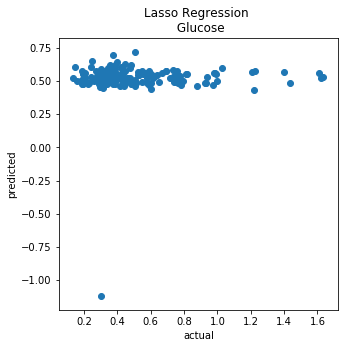

In [55]:
plt.figure(figsize=(5,5))
plt.title("Lasso Regression \n Glucose")
plt.xlabel("actual")
plt.ylabel("predicted")
plt.scatter(y_test_no_scale_Glucose, prediction_no_scale_Glucose)

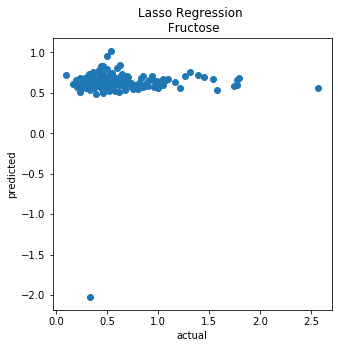

In [56]:
plt.figure(figsize=(5,5))
plt.title("Lasso Regression \n Fructose")
plt.xlabel("actual")
plt.ylabel("predicted")
plt.scatter(y_test_no_scale_Fructose, prediction_no_scale_Fructose)

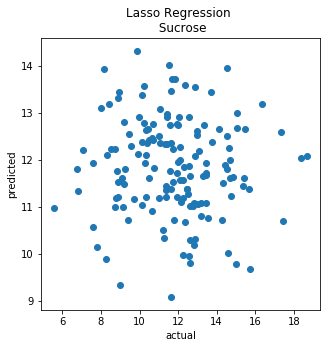

In [57]:
plt.figure(figsize=(5,5))
plt.title("Lasso Regression \n Sucrose")
plt.xlabel("actual")
plt.ylabel("predicted")
plt.scatter(y_test_no_scale_Sucrose, prediction_no_scale_Sucrose)

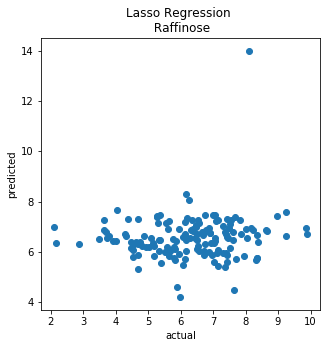

In [58]:
plt.figure(figsize=(5,5))
plt.title("Lasso Regression \n Raffinose")
plt.xlabel("actual")
plt.ylabel("predicted")
plt.scatter(y_test_no_scale_Raffinose, prediction_no_scale_Raffinose)

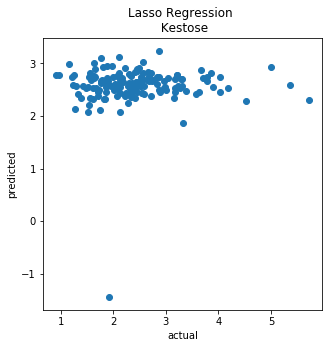

In [59]:
plt.figure(figsize=(5,5))
plt.title("Lasso Regression \n Kestose")
plt.xlabel("actual")
plt.ylabel("predicted")
plt.scatter(y_test_no_scale_Kestose, prediction_no_scale_Kestose)

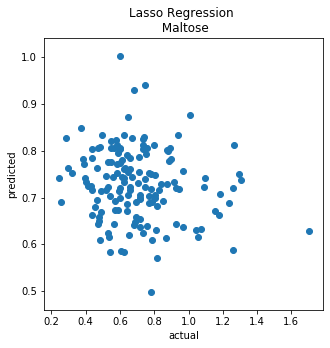

In [60]:
plt.figure(figsize=(5,5))
plt.title("Lasso Regression \n Maltose")
plt.xlabel("actual")
plt.ylabel("predicted")
plt.scatter(y_test_no_scale_Maltose, prediction_no_scale_Maltose)

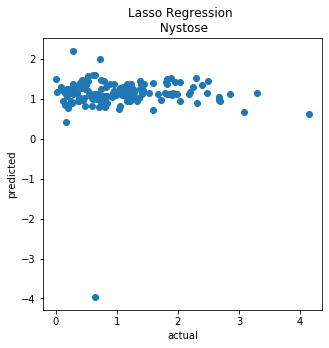

In [61]:
plt.figure(figsize=(5,5))
plt.title("Lasso Regression \n Nystose")
plt.xlabel("actual")
plt.ylabel("predicted")
plt.scatter(y_test_no_scale_Nystose, prediction_no_scale_Nystose)

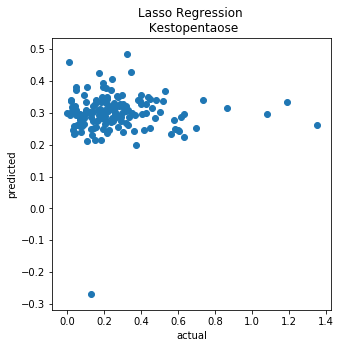

In [62]:
plt.figure(figsize=(5,5))
plt.title("Lasso Regression \n Kestopentaose")
plt.xlabel("actual")
plt.ylabel("predicted")
plt.scatter(y_test_no_scale_Kestopentaose, prediction_no_scale_Kestopentaose)

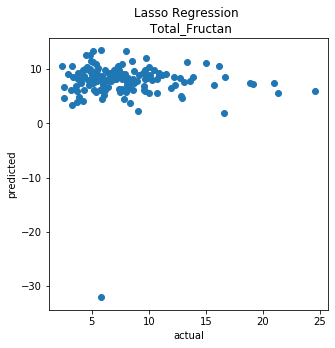

In [63]:
plt.figure(figsize=(5,5))
plt.title("Lasso Regression \n Total_Fructan")
plt.xlabel("actual")
plt.ylabel("predicted")
plt.scatter(y_test_no_scale_Total_Fructan, prediction_no_scale_Total_Fructan)

In [92]:
# slope = elasticNet.coef_
# slope.max()

In [69]:
# intercept = elasticNet.intercept_
# print(intercept)